# 30 Day Map Challenge

## Day 6 - Network

Plan: Map the cycle network of Amsterdam

In [1]:
import osmnx as ox

Importing the Bike [Data](https://www.openstreetmap.org/export#map=14/52.3683/4.8961)

In [2]:
Bike = ox.graph_from_bbox(52.3893,52.3530,4.8613,4.9390,retain_all=True, truncate_by_edge=True,
                        simplify=False, network_type = 'bike')

Umpacking the Data

In [3]:
u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in Bike.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)    

Mapping colours relative to bike lane length

In [4]:
# List to store colors
laneColors = []

# The length is in meters
for item in data:
    if "length" in item.keys():
        if item["length"] <= 50:
            color = "#029DB1"   
        elif item["length"] > 50 and item["length"] <= 100:
            color = "#8F0EFF"
        elif item["length"] > 100 and item["length"] <= 150:
            color = "#62C7FF"
        elif item["length"] > 150 and item["length"] <= 200:
            color = "#004DCF"
        else:
            color = "#8d6fff"
             
    laneColors.append(color)

Building Map

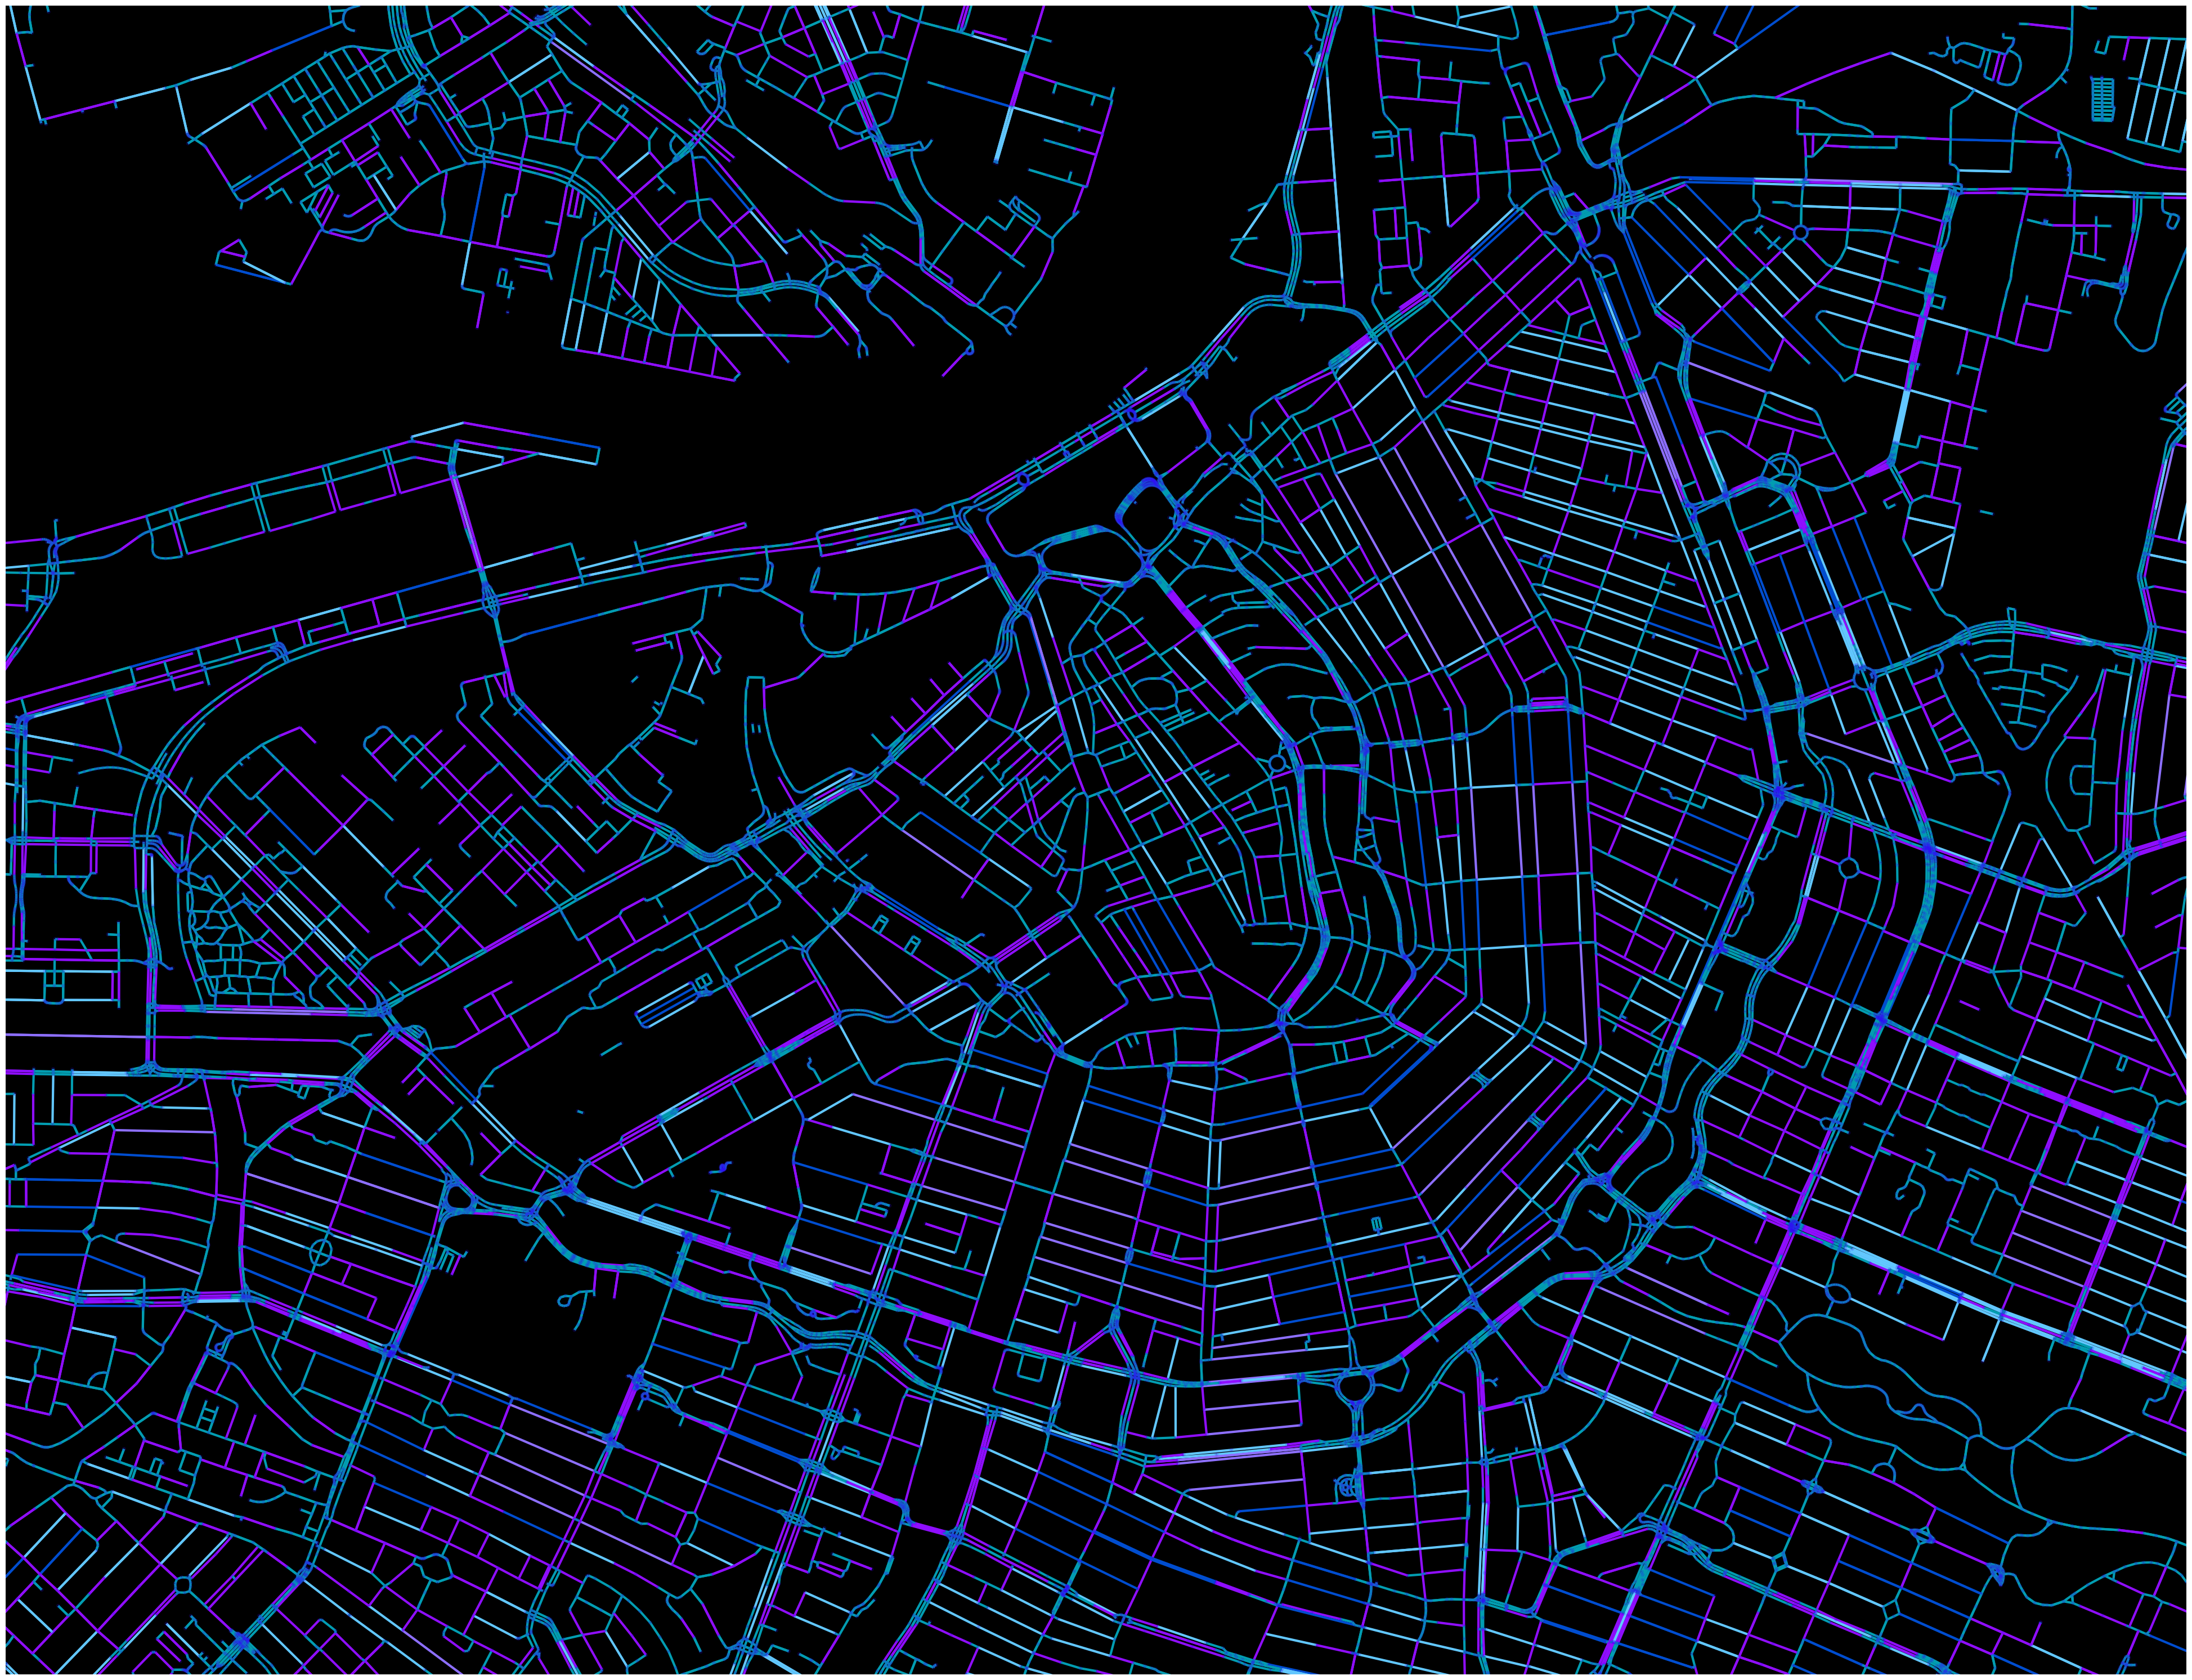

In [5]:
fig, ax = ox.plot_graph(Bike, node_size=25, node_alpha=0.2, node_color="#3600FF", bbox = (52.3893,52.3530,4.8613,4.9390), 
                        dpi = 300,  bgcolor = "#000000", figsize=(50,50), save = False, edge_color=laneColors,
                        edge_linewidth=3, edge_alpha=1)